In [1]:
from env import UArmEnv

env = UArmEnv(render=False)
env.reset()

# Keep the arm still (optional)
action = [0.0, 0.8, -1.57, 0]
for _ in range(10):
    env.step(action)

env.get_camera_image()
env.capture_image_and_dummy_label("test_dataset", image_index=0)
env.close()


pybullet build time: Jan 29 2025 23:16:28


b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
camera_linkb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
camera_link✅ Saved image + YOLO label to: test_dataset/images/image_0000.png, test_dataset/labels/image_0000.txt


In [ ]:
from env import UArmEnv

env = UArmEnv(render=False)  # use render=True if you want to see it
env.reset()

action = [0.0, 0.8, -1.57,0]


# Let the arm settle
for _ in range(10):
    env.step(action)
env.get_camera_image()
env.capture_single_image("test_image.png")
env.estimate_camera_bounds()
# Capture one image

env.close()


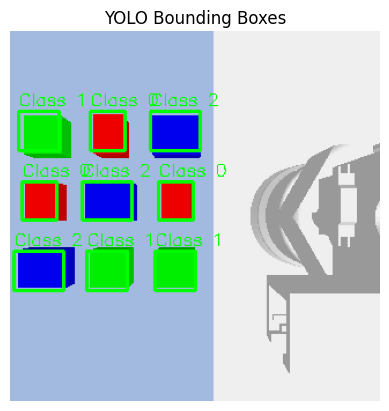

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("test_dataset/images/image_0000.png")
h, w, _ = img.shape

with open("test_dataset/labels/image_0000.txt") as f:
    for line in f:
        cls, cx, cy, bw, bh = map(float, line.strip().split())
        cx, cy, bw, bh = cx * w, cy * h, bw * w, bh * h
        x1, y1 = int(cx - bw / 2), int(cy - bh / 2)
        x2, y2 = int(cx + bw / 2), int(cy + bh / 2)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, f"Class {int(cls)}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("YOLO Bounding Boxes")
plt.show()


In [3]:
from env import UArmEnv
import os

def generate_yolo_dataset(n=200, base_dir="train_dataset"):
    env = UArmEnv(render=False)

    os.makedirs(os.path.join(base_dir, "images"), exist_ok=True)
    os.makedirs(os.path.join(base_dir, "labels"), exist_ok=True)

    for i in range(n):
        env.reset()
        action = [0.0, 0.8, -1.57, 0]
        for _ in range(10):
            env.step(action)
        env.get_camera_image()
        env.capture_image_and_dummy_label(base_dir, i)
        if i % 20 == 0:
            print(f"📸 Saved {i}/{n} samples...")

    env.close()
    print(f"✅ Dataset generation complete: {n} samples saved to '{base_dir}/'")


In [4]:
generate_yolo_dataset(n=300, base_dir="train_dataset")


b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
camera_linkb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
camera_link✅ Saved image + YOLO label to: train_dataset/images/image_0000.png, train_dataset/labels/image_0000.txt
📸 Saved 0/300 samples...
b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
camera_link✅ Saved image + YOLO label to: train_dataset/images/image_0001.png, train_dataset/labels/image_0001.

In [ ]:
yaml_content = """
train: ./train_dataset/images
val: ./train_dataset/images  # You can later create a val split

nc: 3
names: ['small', 'medium', 'large']
"""

with open("data.yaml", "w") as f:
    f.write(yaml_content.strip())

print("✅ data.yaml saved!")


✅ data.yaml saved!


In [7]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")
results = model("test_dataset/images/image_0000.png")

# Print results for first image
for box in results[0].boxes:
    cls = int(box.cls[0])
    conf = float(box.conf[0])
    x_center, y_center, w, h = map(float, box.xywhn[0])
    print(f"Class: {cls}, Confidence: {conf:.2f}, X: {x_center:.3f}, Y: {y_center:.3f}")



image 1/1 /home/fatduck/git/ai_project/main/UArm_robot_working/test_dataset/images/image_0000.png: 320x320 3 smalls, 3 mediums, 3 larges, 4.2ms
Speed: 0.5ms preprocess, 4.2ms inference, 103.2ms postprocess per image at shape (1, 3, 320, 320)
Class: 2, Confidence: 0.99, X: 0.447, Y: 0.270
Class: 2, Confidence: 0.99, X: 0.263, Y: 0.459
Class: 0, Confidence: 0.99, X: 0.447, Y: 0.459
Class: 1, Confidence: 0.98, X: 0.264, Y: 0.649
Class: 2, Confidence: 0.98, X: 0.079, Y: 0.649
Class: 1, Confidence: 0.98, X: 0.080, Y: 0.270
Class: 0, Confidence: 0.98, X: 0.263, Y: 0.270
Class: 1, Confidence: 0.97, X: 0.448, Y: 0.649
Class: 0, Confidence: 0.95, X: 0.079, Y: 0.459


In [4]:
from env import UArmEnv
env = UArmEnv(render=False)
env.reset()
action = [0.0, 0.8, -1.57, 0]
for _ in range(10):
    env.step(action)
env.get_camera_image()
env.capture_image_label_and_gt("test_dataset", image_index=0)
env.close()


b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
camera_linkb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
camera_link✅ Saved image, label, and ground truth for image_0000
✅ Saved image and dummy label to folders (index 0000)


In [ ]:
from env import UArmEnv
from ultralytics import YOLO
import cv2
import numpy as np
import os

# Step 1: Run environment and capture ground truth + label
env = UArmEnv(render=False)
env.reset()
action = [0.0, 0.8, -1.57, 0]
for _ in range(10):
    env.step(action)

env.get_camera_image()
env.capture_image_label_and_gt("test_dataset", image_index=0)
env.close()

# Step 2: Run YOLOv8 prediction on the saved image
image_path = "test_dataset/images/image_0000.png"
model = YOLO("runs/detect/train/weights/best.pt")
results = model(image_path)

# Step 3: Convert YOLO predictions back to world coordinates
X_MIN, X_MAX = -0.170, 0.210
Y_MIN, Y_MAX = -0.120,-0.490

print("\n📍 YOLO Predicted World Coordinates:")
for box in results[0].boxes:
    cls = int(box.cls[0])
    conf = float(box.conf[0])
    x_center_n, y_center_n = map(float, box.xywhn[0][:2])

    # Convert back to world coordinates (reverse normalisation)
    x_world = X_MIN + (1.0 - x_center_n) * (X_MAX - X_MIN)
    y_world = Y_MIN + y_center_n * (Y_MAX - Y_MIN)

    

    print(f"Class {cls}, Confidence: {conf:.2f}, X: {x_world:.3f}, Y: {y_world:.3f}")


b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
camera_linkb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
camera_link✅ Saved image, label, and ground truth for image_0000
✅ Saved image and dummy label to folders (index 0000)

image 1/1 /home/fatduck/git/ai_project/main/UArm_robot_working/test_dataset/images/image_0000.png: 320x320 1 small, 4 mediums, 4 larges, 4.6ms
Speed: 0.3ms preprocess, 4.6ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 320)

📍 YOLO Predicted World Coordinates:
Class 2, Confidence: 0.99, X: 0.040, Y: -0.220
Class 2, Confidence: 0.99, X: 0.110, Y: -0.220
Class 1